In [ ]:
!pip install functools'

In [ ]:
!pip install pandas_datareader

In [ ]:
pip install altair vega notebook vega_datasets

In [3]:
!pip install textblob nltk

     |████████████████████████████████| 636 kB 4.9 MB/s eta 0:00:01


In [24]:
!pip install spacy

     |████████████████████████████████| 6.3 MB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 457 kB 12.3 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 386 kB/s  eta 0:00:01
     |████████████████████████████████| 128 kB 12.2 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 219 kB/s  eta 0:00:01
     |████████████████████████████████| 9.9 MB 24 kB/s s eta 0:00:01
     |████████████████████████████████| 661 kB 12.2 MB/s eta 0:00:01
     |████████████████████████████████| 181 kB 11.7 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 948 kB/s  eta 0:00:01


In [30]:
!pip install networkx

In [114]:
from functools import reduce
import re 
import pandas as pd
import numpy as np 
import seaborn as sns
import requests 
import xml.etree.ElementTree as ET
from bs4 import BeautifulSoup
import datetime
from pandas_datareader import data
import matplotlib.pyplot as plt 
import json
from IPython.core.display import display, HTML
import altair as alt
import sys
import textblob.download_corpora
import nltk
from textblob import TextBlob
import spacy
import networkx as nx 
from networkx.algorithms import community
import random
from sklearn import tree
from sklearn.tree import export_text
from sklearn.metrics import r2_score
from sklearn.tree import export_text
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering

In [2]:
%matplotlib inline

In [5]:
textblob.download_corpora.main()
nltk.download('tagsets')

[nltk_data] Downloading package brown to /home/spencer/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /home/spencer/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /home/spencer/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/spencer/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     /home/spencer/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/spencer/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


Finished.


[nltk_data] Downloading package tagsets to /home/spencer/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

In [26]:
spacy download en 

SyntaxError: invalid syntax (1329091399.py, line 1)

In [101]:
data = pd.read_csv('data/gapminder.tsv', sep = '\t')
movies = pd.read_csv('data/movies.csv')
net = nx.read_graphml("data/florentine.graphml")
iris = pd.read_csv("data/iris.csv")
cars =pd.read_json('data/cars.json').dropna()
titan = pd.read_csv("data/titanic.csv").dropna()

In [ ]:
#30. Introduction to Altair 

In [ ]:
df = pd.DataFrame({
    'city': ['Seattle', 'Seattle', 'Seattle', 'New York', 'New York', 'New York', 'Chicago', 'Chicago', 'Chicago'],
    'month': ['Apr', 'Aug', 'Dec', 'Apr', 'Aug', 'Dec', 'Apr', 'Aug', 'Dec'],
    'precip': [2.68, 0.87, 5.31, 3.94, 4.13, 3.58, 3.62, 3.98, 2.56]
})

df

In [ ]:
# the chart object 

chart = alt.Chart(df)
chart

In [ ]:
# marks and encoding 

ch2 = chart.mark_rect()
ch2

In [ ]:
alt.Chart(df).mark_point().encode(
    y = 'city', )

In [ ]:
alt.Chart(df).mark_point().encode(
    x = 'city',
    y = 'precip')

In [ ]:
alt.Chart(df).mark_point().encode(
    alt.X('precip'),
    alt.Y('city'))

In [ ]:
# data aggregation

alt.Chart(df).mark_point().encode(
    alt.X('average(precip)'),
    alt.Y('city'))

In [ ]:
df2 = df.groupby('city').mean().reset_index()
alt.Chart(df2).mark_point().encode(
    alt.X('precip'),
    alt.Y('city'))

In [ ]:
# changing the mark type 

alt.Chart(df).mark_bar().encode(
    alt.X('average(precip)'),
    alt.Y('city'))

In [ ]:
alt.Chart(df).mark_bar().encode(
    alt.X('city'),
    alt.Y('average(precip)'))

In [ ]:
# combining charts 

chart1 = alt.Chart(df).mark_line().encode(
            alt.X('month'),
            alt.Y('average(precip)'),
            color = 'city')
chart1

In [ ]:
chart2 = alt.Chart(df).mark_point().encode(
            alt.X('month'),
            alt.Y('average(precip)'),
            color = 'city')
chart2

In [ ]:
chart3 = chart1 | chart2
chart3

In [ ]:
chart4 = chart1 & chart2 
chart4

In [ ]:
chart5 = chart1 + chart2 
chart5 

In [ ]:
chart5 | chart4

In [ ]:
chart5.interactive()

In [ ]:
chart5.save('chart.html')

In [ ]:
# 31. Data Typesm Graphical Marks, and Visual Encoding Channels 

In [ ]:
data = pd.read_csv('data/gapminder.tsv', sep = '\t')
data.head(5)

In [ ]:
# data types 
# nominal -> consists of category names; can compare the equality of values; when visualizing we should readily be able to see if values are the same or different posiiton 
# ordinal -> consists of values that have a specific ordering; can compare the rank ordering of values; when visualizing we should be able to perceive a sense of rank order 
# quantitative -> able to measure numerical differences among values; 
#   for interval data, we can measure the distance between points 
#   for ratio data, the zero point is meaningful and so we can alos measure proportions or scale values 
#   can be visualized using position, size, or color values 
#   axises with zero baselines are essential for visualizing ratio data
# temporal -> measures time points or intervals

In [ ]:
data.dtypes

In [ ]:
alt.Chart(data).mark_point().encode(
    alt.X('lifeExp:Q'))

In [ ]:
alt.Chart(data).mark_point().encode(
    alt.X('lifeExp:N'))

In [ ]:
alt.Chart(data).mark_point().encode(
    alt.X('lifeExp:O'))

In [ ]:
# encoding channels: 
# x -> horizontal position of the mark 
# y -> vertical position of the mark 
# size -> size of the mark; may correspond to area or length 
# color -> mark color; specified a a legal CSS color 
# opacity -> mark opacity ranging from 0 (full transparent) to 1 (fully opaque)
# shape -> plotting symbol shape for point marks 
# tooltip -> specifies that text should be displayed upon the mouse hovering over the mark 
# order -> mark ordering; determines line/area point order and drawing order 
# column -> facet the data into horizontally aligned subplots 
# row -> facet the data into vertically aligned subplots 


In [ ]:
alt.Chart(data).mark_point().encode(
    alt.X('lifeExp:Q'))

In [ ]:
alt.Chart(data).mark_point().encode(
    alt.X('lifeExp:Q'),
    alt.Y('continent:O'))

In [ ]:
alt.Chart(data).mark_point().encode(
    alt.X('lifeExp:Q'),
    alt.Y('pop:Q'))

In [ ]:
alt.Chart(data).mark_point().encode(
    alt.X('lifeExp:Q', scale = alt.Scale(zero = False)),
    alt.Y('pop:Q', scale = alt.Scale(zero = False)))

In [ ]:
alt.Chart(data).mark_point().encode(
    alt.X('gdpPercap:Q'),
    alt.Y('lifeExp:Q'),
    alt.Size('pop:Q'))

In [ ]:
alt.Chart(data).mark_point().encode(
    alt.X('gdpPercap:Q'),
    alt.Y('lifeExp:Q'),
    alt.Size('pop:Q', scale = alt.Scale(range = [0, 1000])))

In [ ]:
alt.Chart(data).mark_point().encode(
    alt.X('lifeExp:Q'),
    alt.Y('pop:Q'),
    alt.Color('continent:N'))

In [ ]:
alt.Chart(data).mark_point(filled = True).encode(
    alt.X('lifeExp:Q'),
    alt.Y('pop:Q'),
    alt.Color('continent:N'))

In [ ]:
alt.Chart(data).mark_point(filled = True, opacity = 0.5).encode(
    alt.X('lifeExp:Q'),
    alt.Y('pop:Q'),
    alt.Color('continent:N'))

In [ ]:
alt.Chart(data).mark_point(filled = True, opacity = 0.5).encode(
    alt.X('lifeExp:Q'),
    alt.Y('pop:Q'),
    alt.Shape('continent:N'))

In [ ]:
alt.Chart(data).mark_point(filled = True, opacity = 0.5).encode(
    alt.X('lifeExp:Q'),
    alt.Y('pop:Q'),
    alt.Color('continent:N'),
    alt.Tooltip('country'))

In [ ]:
alt.Chart(data).mark_point(filled = True, opacity = 1).encode(
    alt.X('gdpPercap:Q'),
    alt.Y('lifeExp:Q'),
    alt.Size('pop:Q', scale = alt.Scale(range = [0, 1000])),
    alt.Color('continent:N'),
    alt.Tooltip('country:N'),
    alt.Order('pop:Q', sort = 'descending'))

In [ ]:
alt.Chart(data).mark_point(filled = True, opacity = 1).encode(
    alt.X('gdpPercap:Q'),
    alt.Y('lifeExp:Q'),
    alt.Size('pop:Q', scale = alt.Scale(range = [0,1000])),
    alt.Color('continent:N'),
    alt.Order('pop:Q', sort = 'descending'),
    alt.Tooltip(['country:N', 'year:O']))

In [ ]:
alt.Chart(data).mark_point(filled = True, opacity = 1).encode(
    alt.X('gdpPercap:Q'),
    alt.Y('lifeExp:Q'),
    alt.Size('pop:Q', scale = alt.Scale(range = [0,1000])),
    alt.Color('continent:N'),
    alt.Order('pop:Q', sort = 'descending'),
    alt.Column('year'))

In [ ]:
alt.Chart(data).mark_point(filled = True, opacity = 1).encode(
    alt.X('gdpPercap:Q'),
    alt.Y('lifeExp:Q'),
    alt.Size('pop:Q', scale = alt.Scale(range = [0,1000])),
    alt.Color('continent:N'),
    alt.Order('pop:Q', sort = 'descending'),
    alt.Column('year')).properties(width = 135, height = 135)

In [ ]:
# graphical marks 
# mark_area() -> filled areas defined bya top line and a baseline 
# mark_bar() -> rectangular bars 
# mark_circle() -> scallter plot points as filled circles
# mark_line() -> connected line segments 
# mark_point() -> scatter plot points with configurable shapes 
# mark_rect() -> filled rectangles; useful for heatmaps 
# mark_rule() -> vertical or horizontal lines spanning the axis 
# mark_square() -> scatter plot points as filled squares 
# mark_text() -> scatter plot points represented by text 
# mark_tick() -> vertical or horizontal tick marks 

In [ ]:
alt.Chart(data).mark_point().encode(
    alt.X('lifeExp:Q'),
    alt.Y('continent:N'),
    alt.Shape('continent:N'))

In [ ]:
alt.Chart(data).mark_point(filled = True, size = 100).encode(
    alt.X('lifeExp:Q'),
    alt.Y('continent:N'),
    alt.Shape('continent:N'))

In [ ]:
alt.Chart(data).mark_circle().encode(
    alt.X('lifeExp:Q'),
    alt.Y('continent:N'),
    alt.Shape('continent:N'))

In [ ]:
alt.Chart(data).mark_square().encode(
    alt.X('lifeExp:Q'),
    alt.Y('continent:N'),
    alt.Shape('continent:N'))

In [ ]:
alt.Chart(data).mark_tick().encode(
    alt.X('lifeExp:Q'),
    alt.Y('continent:N'),
    alt.Shape('continent:N'))

In [ ]:
alt.Chart(data).mark_bar().encode(
    alt.X('lifeExp:Q'),
    alt.Y('continent:N'))

In [ ]:
alt.Chart(data).mark_bar().encode(
    alt.X('average(lifeExp)'),
    alt.Y('continent:N'))

In [ ]:
alt.Chart(data).mark_bar().encode(
    alt.X('lifeExp:Q'),
    alt.Y('continent:N'),
    alt.Color('country'))

In [ ]:
alt.Chart(data).mark_bar().encode(
    alt.X('year:O'),
    alt.Y('lifeExp:Q'),
    alt.Color('continent:N'))

In [ ]:
alt.Chart(data).mark_bar().encode(
    alt.X('min(lifeExp):Q'),
    alt.X2('max(lifeExp):Q'),
    alt.Y('continent:N'))

In [ ]:
alt.Chart(data).mark_line().encode(
    alt.X('year:O'),
    alt.Y('average(lifeExp):Q'),
    alt.Color('continent:N', legend = None)).properties(width = 400)

In [ ]:
alt.Chart(data).mark_line(strokeWidth = 3, opacity = 0.5, interpolate = 'monotone').encode(
    alt.X('year:O'),
    alt.Y('lifeExp:Q'),
    alt.Color('country:N', legend = None)).properties(width = 400)

In [ ]:
dataUS = data.loc[data['country'] == 'United States']

alt.Chart(dataUS).mark_area().encode(
    alt.X('year:O'),
    alt.Y('gdpPercap:Q'))

In [ ]:
dataNA = data.loc[
    (data['country'] == 'United States') |
    (data['country'] == 'Canada') |
    (data['country'] == 'Mexico')]

alt.Chart(dataNA).mark_area().encode(
    alt.X('year:O'),
    alt.Y('gdpPercap:Q'),
    alt.Color('country:N'))

In [ ]:
alt.Chart(dataNA).mark_area().encode(
    alt.X('year:O'),
    alt.Y('gdpPercap:Q', stack = 'center'),
    alt.Color('country:N'))

In [ ]:
alt.Chart(dataNA).mark_area(opacity = 0.5).encode(
    alt.X('year:O'),
    alt.Y('gdpPercap:Q', stack = None),
    alt.Color('country:N'))

In [ ]:
alt.Chart(dataNA).mark_area().encode(
    alt.X('year:O'),
    alt.Y('min(gdpPercap):Q'),
    alt.Y2('max(gdpPercap):Q'))

In [ ]:
# 32. Data Transformation 

In [ ]:
movies = pd.read_csv('data/movies.csv')
movies.shape 

In [ ]:
movies.head(5)

In [ ]:
alt.Chart(movies).mark_circle().encode(
    alt.X('Rotten_Tomatoes_Rating:Q'),
    alt.Y('IMDB_Rating:Q'))

In [ ]:
movies['binned_rating'] = pd.cut(movies['Rotten_Tomatoes_Rating'], 20).apply(lambda x: x.mid)
movies.dropna().head()

In [ ]:
df = movies.groupby('binned_rating')[['Title']].count().reset_index()
df.head()

In [ ]:
alt.Chart(df).mark_bar().encode(
    alt.X('binned_rating:Q'),
    alt.Y('Title:Q'))

In [ ]:
alt.Chart(movies).mark_circle().encode(
    alt.X('Rotten_Tomatoes_Rating:Q', bin = True),
    alt.Y('IMDB_Rating:Q'))

In [ ]:
alt.Chart(movies).mark_bar().encode(
    alt.X('Rotten_Tomatoes_Rating:Q', bin = True),
    alt.Y('count()'))

In [ ]:
alt.Chart(movies).mark_bar().encode(
    alt.X('Rotten_Tomatoes_Rating:Q', bin = alt.BinParams(maxbins = 20)),
    alt.Y('count()'))

In [ ]:
alt.Chart(movies).mark_bar().encode(
    alt.X('IMDB_Rating:Q', bin = alt.BinParams(maxbins = 20)),
    alt.Y('count()'))

In [ ]:
alt.Chart(movies).mark_circle().encode(
    alt.X('Rotten_Tomatoes_Rating:Q', bin=alt.BinParams(maxbins=20)),
    alt.Y('IMDB_Rating:Q', bin=alt.BinParams(maxbins=20)))

In [ ]:
alt.Chart(movies).mark_circle().encode(
    alt.X('Rotten_Tomatoes_Rating:Q', bin=alt.BinParams(maxbins=20)),
    alt.Y('IMDB_Rating:Q', bin=alt.BinParams(maxbins=20)),
    alt.Size('count()')
)

In [ ]:
alt.Chart(movies).mark_bar().encode(
    alt.X('Rotten_Tomatoes_Rating:Q', bin = alt.BinParams(maxbins = 20)),
    alt.Y('IMDB_Rating:Q', bin = alt.BinParams(maxbins = 20)),
    alt.Color('count()'))

In [ ]:
alt.Chart(movies).mark_bar().encode(
    alt.X('average(Rotten_Tomatoes_Rating):Q'),
    alt.Y('Major_Genre:N'))

In [ ]:
alt.Chart(movies).mark_bar().encode(
    alt.X('average(Rotten_Tomatoes_Rating):Q'),
    alt.Y('Major_Genre:N', sort = alt.EncodingSortField(
        op = 'average', field = 'Rotten_Tomatoes_Rating', order = 'descending')))

In [ ]:
alt.Chart(movies).mark_bar().encode(
    alt.X('median(Rotten_Tomatoes_Rating):Q'),
    alt.Y('Major_Genre:N', sort = alt.EncodingSortField(
        op = 'median', field = 'Rotten_Tomatoes_Rating', order = 'descending')))

In [ ]:
alt.Chart(movies).mark_bar().encode(
    alt.X('q1(Rotten_Tomatoes_Rating):Q'),
    alt.X2('q3(Rotten_Tomatoes_Rating):Q'),
    alt.Y('Major_Genre:N', sort = alt.EncodingSortField(
        op = 'median', field = 'Rotten_Tomatoes_Rating', order = 'descending')))

In [ ]:
alt.Chart(movies).mark_area().encode(
    alt.X('month(Release_Date):T'),
    alt.Y('median(US_Gross):Q'))

In [ ]:
alt.Chart(movies).mark_area().encode(
    alt.X('month(Release_Date):T'),
    alt.Y('median(Worldwide_Gross):Q'))

In [ ]:
# 36. Tokenization

In [7]:
wisdom = "Once I finally figured out all of life's answers, they changed the questions. Anonymous 5.3."
print(wisdom)

Once I finally figured out all of life's answers, they changed the questions. Anonymous 5.3.


In [8]:
for sentence in wisdom.split('.'):
    print(sentence)

Once I finally figured out all of life's answers, they changed the questions
 Anonymous 5
3



In [9]:
blob = TextBlob(wisdom)
blob.sentences

[Sentence("Once I finally figured out all of life's answers, they changed the questions."),
 Sentence("Anonymous 5.3.")]

In [11]:
for sentence in blob.sentences:
    print(sentence)

Once I finally figured out all of life's answers, they changed the questions.
Anonymous 5.3.


In [12]:
for word in wisdom.split():
    print(word)

Once
I
finally
figured
out
all
of
life's
answers,
they
changed
the
questions.
Anonymous
5.3.


In [13]:
for word in blob.words:
    print(word)

Once
I
finally
figured
out
all
of
life
's
answers
they
changed
the
questions
Anonymous
5.3


In [14]:
for noun_phrase in blob.noun_phrases:
    print(noun_phrase)

life 's answers
anonymous


In [16]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [17]:
print(wisdom)

Once I finally figured out all of life's answers, they changed the questions. Anonymous 5.3.


In [19]:
for word, tag in blob.pos_tags:
    print(word, tag)

Once RB
I PRP
finally RB
figured VBD
out RP
all DT
of IN
life NN
's POS
answers NNS
they PRP
changed VBD
the DT
questions NNS
Anonymous JJ
5.3 CD


In [20]:
b2 = TextBlob("Time flies like an arrow")
b2.pos_tags

[('Time', 'NNP'),
 ('flies', 'NNS'),
 ('like', 'IN'),
 ('an', 'DT'),
 ('arrow', 'NN')]

In [ ]:
# 37. Sentiment Analysis 

In [21]:
song = """It's great to learn Python. But it's hard to learn it well.
Everything starts hard, but then becomes easy. So you should be happy,
because it all ends soon"""
print(song)

It's great to learn Python. But it's hard to learn it well.
Everything starts hard, but then becomes easy. So you should be happy,
because it all ends soon


In [22]:
blob = TextBlob(song)
blob.sentiment

Sentiment(polarity=0.29, subjectivity=0.7333333333333333)

In [23]:
for sent in blob.sentences:
    print(sent, sent.sentiment)

It's great to learn Python. Sentiment(polarity=0.8, subjectivity=0.75)
But it's hard to learn it well. Sentiment(polarity=-0.2916666666666667, subjectivity=0.5416666666666666)
Everything starts hard, but then becomes easy. Sentiment(polarity=0.07083333333333333, subjectivity=0.6875)
So you should be happy,
because it all ends soon Sentiment(polarity=0.8, subjectivity=1.0)


In [27]:
nlp = spacy.load('en_core_web_sm')

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
# 38. Basic Network Concepts 

In [33]:
net1 = nx.Graph()

In [34]:
net1.add_node('Alice')
net1.add_node('Bob')
net1.add_node('Chuck')
net1.add_edge('Alice', 'Bob')
net1.add_edge('Bob', 'Chuck')

In [35]:
net1.nodes()

NodeView(('Alice', 'Bob', 'Chuck'))

In [36]:
net1.edges()

EdgeView([('Alice', 'Bob'), ('Bob', 'Chuck')])

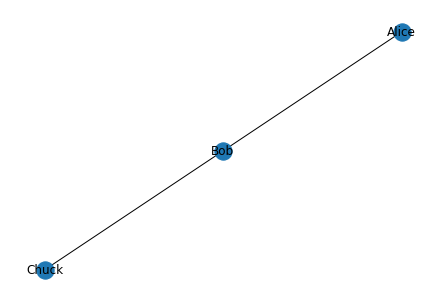

In [37]:
nx.draw(net1, with_labels = True) 

In [38]:
net2 = nx.DiGraph()
net2.add_node('Alice')
net2.add_node('Bob')
net2.add_node('Chuck')
net2.add_edge('Alice', 'Bob')
net2.add_edge('Bob', 'Chuck')

In [39]:
net2.edges()

OutEdgeView([('Alice', 'Bob'), ('Bob', 'Chuck')])

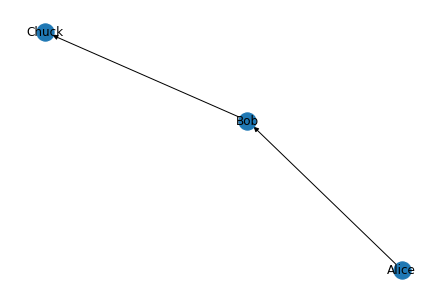

In [40]:
nx.draw(net2, with_labels = True)

In [41]:
net3 = nx.Graph()
net3.add_node('Alice')
net3.add_node('Bob')
net3.add_node('Chuck')
net3.add_edge('Alice', 'Bob', weight = 2)
net3.add_edge('Bob', 'Chuck', weight = 1)

In [42]:
net3.edges()

EdgeView([('Alice', 'Bob'), ('Bob', 'Chuck')])

In [43]:
net3.edges(data = True)

EdgeDataView([('Alice', 'Bob', {'weight': 2}), ('Bob', 'Chuck', {'weight': 1})])

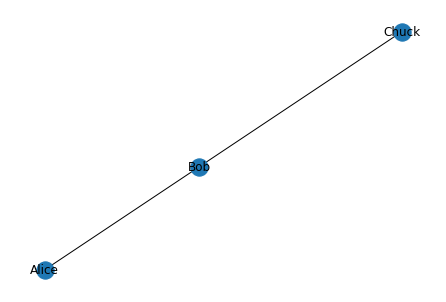

In [44]:
nx.draw(net3, with_labels = True)

In [45]:
apollo = nx.Graph()
apollo.add_node("Tom Hanks")
apollo.add_node("Bill Paxton")
apollo.add_node("Gary Sinise")
apollo.add_node("Ed Harris")
apollo.add_node("Kevin Bacon")
apollo.add_edge("Tom Hanks", "Bill Paxton", movies = ["Magnificent Desolation: Walking on the Moon"])
apollo.add_edge("Tom Hanks", "Gary Sinise", movies = ["The Green Mile"])
apollo.add_edge("Bill Paxton", "Gary Sinise", movies = ["Magnificent Desolation: Walking on the Moon"])
apollo.add_edge("Gary Sinise", "Kevin Bacon", movies = ["Beyond All Boundaries"])
apollo.add_edge("Gary Sinise", "Ed Harris", movies = ["The Human Stain"])

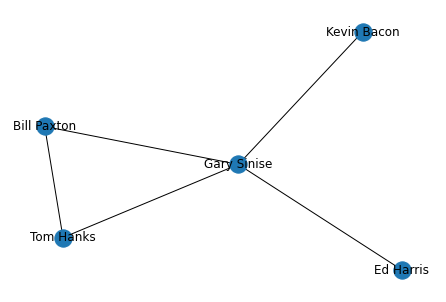

In [46]:
nx.draw(apollo, with_labels = True)

In [47]:
list(apollo.neighbors('Tom Hanks'))

['Bill Paxton', 'Gary Sinise']

In [51]:
nx.adjacency_matrix(apollo).todense()

matrix([[0, 1, 1, 0, 0],
        [1, 0, 1, 0, 0],
        [1, 1, 0, 1, 1],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0]])

In [52]:
apollo.nodes()

NodeView(('Tom Hanks', 'Bill Paxton', 'Gary Sinise', 'Ed Harris', 'Kevin Bacon'))

In [53]:
apollo.edges()

EdgeView([('Tom Hanks', 'Bill Paxton'), ('Tom Hanks', 'Gary Sinise'), ('Bill Paxton', 'Gary Sinise'), ('Gary Sinise', 'Kevin Bacon'), ('Gary Sinise', 'Ed Harris')])

In [54]:
nx.cliques_containing_node(apollo)

{'Tom Hanks': [['Gary Sinise', 'Tom Hanks', 'Bill Paxton']],
 'Bill Paxton': [['Gary Sinise', 'Tom Hanks', 'Bill Paxton']],
 'Gary Sinise': [['Gary Sinise', 'Kevin Bacon'],
  ['Gary Sinise', 'Tom Hanks', 'Bill Paxton'],
  ['Gary Sinise', 'Ed Harris']],
 'Ed Harris': [['Gary Sinise', 'Ed Harris']],
 'Kevin Bacon': [['Gary Sinise', 'Kevin Bacon']]}

In [55]:
nx.shortest_path(apollo, 'Tom Hanks', 'Kevin Bacon')

['Tom Hanks', 'Gary Sinise', 'Kevin Bacon']

In [56]:
apollo.add_node('Hani Safadi')

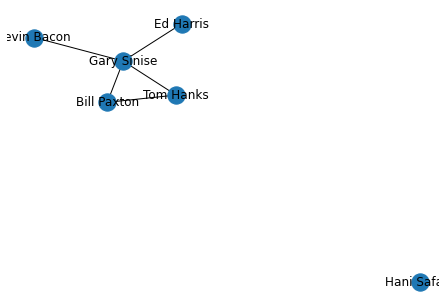

In [57]:
nx.draw(apollo, with_labels = True)

In [ ]:
# 39. Network Structures 

In [58]:
net = nx.Graph()
net.add_node("Tom Hanks")
net.add_node("Bill Paxton")
net.add_node("Gary Sinise")
net.add_node("Ed Harris")
net.add_node("Kevin Bacon")
net.add_edge("Tom Hanks", "Bill Paxton", movies = ["Magnificent Desolation: Walking on the Moon"])
net.add_edge("Tom Hanks", "Gary Sinise", movies = ["The Green Mile"])
net.add_edge("Bill Paxton", "Gary Sinise", movies = ["Magnificent Desolation: Walking on the Moon"])
net.add_edge("Gary Sinise", "Kevin Bacon", movies = ["Beyond All Boundaries"])
net.add_edge("Gary Sinise", "Ed Harris", movies = ["The Human Stain"])

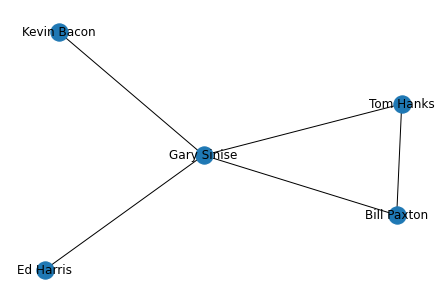

In [59]:
nx.draw(net, with_labels = True)

In [ ]:
nx.degree(net)

DegreeView({'Tom Hanks': 2, 'Bill Paxton': 2, 'Gary Sinise': 4, 'Ed Harris': 1, 'Kevin Bacon': 1})

In [62]:
nx.degree_histogram(net)

[0, 2, 2, 0, 1]

In [64]:
df = pd.DataFrame(nx.degree_histogram(net)).reset_index()
df.columns = ['degree', 'count']
df

,degree,count
0,0,0
1,1,2
2,2,2
3,3,0
4,4,1


In [69]:
alt.renderers.enable('default')
alt.Chart(df).mark_bar().encode(
    alt.X('degree:N'),
    alt.Y('count'))

alt.Chart(...)

In [70]:
nx.density(net)

0.5

In [71]:
nx.average_shortest_path_length(net)

1.5

In [72]:
nx.average_clustering(net)

0.4333333333333333

In [73]:
nx.degree(net)

DegreeView({'Tom Hanks': 2, 'Bill Paxton': 2, 'Gary Sinise': 4, 'Ed Harris': 1, 'Kevin Bacon': 1})

In [74]:
nx.clustering(net)

{'Tom Hanks': 1.0,
 'Bill Paxton': 1.0,
 'Gary Sinise': 0.16666666666666666,
 'Ed Harris': 0,
 'Kevin Bacon': 0}

In [75]:
nx.closeness_centrality(net)

{'Tom Hanks': 0.6666666666666666,
 'Bill Paxton': 0.6666666666666666,
 'Gary Sinise': 1.0,
 'Ed Harris': 0.5714285714285714,
 'Kevin Bacon': 0.5714285714285714}

In [76]:
nx.betweenness_centrality(net)

{'Tom Hanks': 0.0,
 'Bill Paxton': 0.0,
 'Gary Sinise': 0.8333333333333333,
 'Ed Harris': 0.0,
 'Kevin Bacon': 0.0}

In [77]:
nx.eigenvector_centrality(net)

{'Tom Hanks': 0.47348538364848347,
 'Bill Paxton': 0.47348538364848347,
 'Gary Sinise': 0.6358559007605201,
 'Ed Harris': 0.2713949671701046,
 'Kevin Bacon': 0.2713949671701046}

In [78]:
nx.pagerank(net)

{'Tom Hanks': 0.19487677106494403,
 'Bill Paxton': 0.19487677106494403,
 'Gary Sinise': 0.3861385366103877,
 'Ed Harris': 0.11205396062986217,
 'Kevin Bacon': 0.11205396062986217}

In [ ]:
# 40. Network Content and Structures 

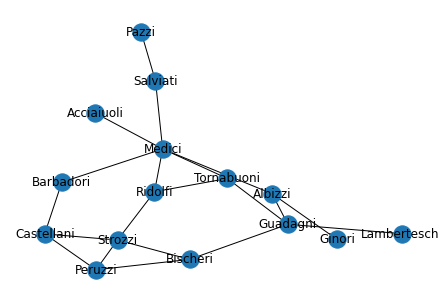

In [4]:
nx.draw(net, with_labels = True)

In [5]:
nx.cliques_containing_node(net)

{'Acciaiuoli': [['Medici', 'Acciaiuoli']],
 'Medici': [['Medici', 'Salviati'],
  ['Medici', 'Albizzi'],
  ['Medici', 'Ridolfi', 'Tornabuoni'],
  ['Medici', 'Acciaiuoli'],
  ['Medici', 'Barbadori']],
 'Castellani': [['Strozzi', 'Peruzzi', 'Castellani'],
  ['Castellani', 'Barbadori']],
 'Peruzzi': [['Strozzi', 'Peruzzi', 'Bischeri'],
  ['Strozzi', 'Peruzzi', 'Castellani']],
 'Strozzi': [['Strozzi', 'Peruzzi', 'Bischeri'],
  ['Strozzi', 'Peruzzi', 'Castellani'],
  ['Strozzi', 'Ridolfi']],
 'Barbadori': [['Medici', 'Barbadori'], ['Castellani', 'Barbadori']],
 'Ridolfi': [['Medici', 'Ridolfi', 'Tornabuoni'], ['Strozzi', 'Ridolfi']],
 'Tornabuoni': [['Medici', 'Ridolfi', 'Tornabuoni'],
  ['Guadagni', 'Tornabuoni']],
 'Albizzi': [['Medici', 'Albizzi'],
  ['Guadagni', 'Albizzi'],
  ['Ginori', 'Albizzi']],
 'Salviati': [['Medici', 'Salviati'], ['Pazzi', 'Salviati']],
 'Pazzi': [['Pazzi', 'Salviati']],
 'Bischeri': [['Strozzi', 'Peruzzi', 'Bischeri'], ['Guadagni', 'Bischeri']],
 'Guadagni': [['G

In [7]:
communities = community.greedy_modularity_communities(net)
communities 

[frozenset({'Acciaiuoli',
            'Medici',
            'Pazzi',
            'Ridolfi',
            'Salviati',
            'Tornabuoni'}),
 frozenset({'Barbadori', 'Bischeri', 'Castellani', 'Peruzzi', 'Strozzi'}),
 frozenset({'Albizzi', 'Ginori', 'Guadagni', 'Lamberteschi'})]

In [ ]:
# 41. Machine Learning 

In [8]:
def decide(income, criminal_record, years_job, credit_payments):
    if income < 30000:
        if criminal_record:
            return 1
        else:
            return 0
    elif income <= 70000:
        if years_job < 1:
            return 0
        elif years_job <= 5:
            if credit_payments:
                return 1
            else:
                return 0 
        else:
            return 1
    else:
        if criminal_record:
            return 0
        else:
            return 1

In [9]:
decide(income = 20000, criminal_record = 1, years_job = 3, credit_payments = 1)

1

In [11]:
random.seed(333)
data = []
for i in range(100):
    income = random.randint(0, 100000)
    criminal_record = random.randint(0, 1)
    years_job = random.randint(0, 10)
    credit_payments = random.randint(0, 1)
    decision = decide(income, criminal_record, years_job, credit_payments)
    data.append({'income':income, 'criminal_record':criminal_record, 'years_job':years_job,
                 'credit_payments':credit_payments, 'decision':decision})

In [12]:
df = pd.DataFrame(data)
df.head(20)

,income,criminal_record,years_job,credit_payments,decision
0,72723,1,5,0,0
1,53005,0,4,1,1
2,55011,1,3,1,1
3,73126,0,6,0,1
4,44408,0,4,1,1
5,63087,1,10,1,1
6,30393,1,8,1,1
7,4727,1,2,1,1
8,9274,0,2,0,0
9,6801,1,2,1,1


In [17]:
dtree = tree.DecisionTreeClassifier().fit(
    df[['income', 'criminal_record', 'years_job', 'credit_payments']], df['decision'])

In [18]:
print(export_text(dtree, feature_names = ['income', 'criminal_record', 'years_job', 'credit_payments']))

|--- income <= 16421.50
|   |--- criminal_record <= 0.50
|   |   |--- class: 0
|   |--- criminal_record >  0.50
|   |   |--- class: 1
|--- income >  16421.50
|   |--- income <= 69501.50
|   |   |--- income <= 51679.50
|   |   |   |--- criminal_record <= 0.50
|   |   |   |   |--- credit_payments <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- credit_payments >  0.50
|   |   |   |   |   |--- income <= 29602.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- income >  29602.50
|   |   |   |   |   |   |--- years_job <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- years_job >  0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- criminal_record >  0.50
|   |   |   |   |--- income <= 48033.00
|   |   |   |   |   |--- years_job <= 3.50
|   |   |   |   |   |   |--- income <= 26917.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- income >  26917.00
|   |   |   |   |   |   |   |--- income <= 40043.00

In [ ]:
# machine learning -> building mathematical models to help understand data; learning enters when we give the models tunable parameters that can be adapted to observed data
#    once these models have been fit to previously seen data, they can be used to predict and understand aspects of newly observed data 

# supervised learning -> models that can predict based on labeled training data 
#    classification -> models that predict labels as two or more discrete categories 
#    regression -> models that predict continuous labels 

# unsupervised learning -> models that identify structure in unlabeled data 
#    clustering -> models that detect and identify distinct groups in the data 
#    dimensionality reduction -> models that detect and identify lower-dimensional structure in higher-dimensional data 

In [ ]:
# 42. Linear Regression 

In [20]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
chart = alt.Chart(iris).mark_circle().encode(
    alt.X(alt.repeat('column'), type = 'quantitative'),
    alt.Y(alt.repeat('row'), type = 'quantitative'),
    alt.Color('species:N')).properties(
        width = 100,
        height = 100).repeat(
            row = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
            column = ['petal_width', 'petal_length', 'sepal_width', 'sepal_length'])

In [22]:
chart

alt.RepeatChart(...)

In [23]:
X_iris = iris.drop('species', axis = 1)
X_iris.shape

(150, 4)

In [24]:
Y_iris = iris['species']
Y_iris.shape

(150,)

In [ ]:
# Basics of the API 
#   1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn
#   2. Choose model hyperparameters by instantiating this class with desired values 
#   3. Arrange data into a features matrix and target vector following the discussion above 
#   4. Fit the model to your data by calling the fit() method of the model instance 
#   5. Apply the model to new data: 
#      For supervised learning, we often predict labels for unknown data using  the predict() method 
#      For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method 

In [27]:
# Supervised Learning: Simple Linear Regression

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.rand(50)

alt.Chart(pd.DataFrame({'x':x, 'y':y})).mark_circle().encode(
    alt.X('x'),
    alt.Y('y'),
    tooltip = ['x', 'y'])

alt.Chart(...)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression(fit_intercept = True)

In [30]:
X = x[:, np.newaxis]

In [31]:
model.fit(X, y)

LinearRegression()

In [32]:
model.coef_

array([2.00660766])

In [33]:
model.intercept_

-0.5350275750800026

In [34]:
xfit = np.linspace(-1, 11)

In [35]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

In [42]:
alt.Chart(pd.DataFrame({'x':x, 'y':y})).mark_circle().encode(x='x', y='y') + alt.Chart(pd.DataFrame({'x':xfit, 'y':yfit})).mark_line().encode(x='x', y='y')

alt.LayerChart(...)

In [ ]:
# Predict Car Mileage 

In [44]:
cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


In [45]:
alt.Chart(cars).mark_point().encode(
    alt.X('Weight_in_lbs'),
    alt.Y('Miles_per_Gallon'))

alt.Chart(...)

In [46]:
X = cars[['Weight_in_lbs']]
Y = cars[['Miles_per_Gallon']]

model = LinearRegression(fit_intercept = True)
model.fit(X, Y)

LinearRegression()

In [47]:
model.coef_

array([[-0.00764734]])

In [48]:
model.intercept_

array([46.21652455])

In [50]:
Yfit = model.predict(X)
cars['predicted_mpg'] = Yfit

In [51]:
chart1 = alt.Chart(cars).mark_point().encode(
    alt.X('Weight_in_lbs'),
    alt.Y('Miles_per_Gallon'))
chart2 = alt.Chart(cars).mark_line(color = 'red').encode(
    alt.X('Weight_in_lbs'),
    alt.Y('predicted_mpg'))
chart1 + chart2

alt.LayerChart(...)

In [52]:
chart3 = alt.Chart(cars).mark_line().encode(
    alt.X('Weight_in_lbs'),
    alt.Y('Miles_per_Gallon'),
    alt.Y2('predicted_mpg'))
chart1 + chart2 + chart3

alt.LayerChart(...)

In [54]:
resid = Y-Yfit
resid.head()

,Miles_per_Gallon
0,-1.420236
1,-2.974889
2,-1.940256
3,-3.963198
4,-2.840840


In [55]:
mss = (resid ** 2).mean()
mss

Miles_per_Gallon    18.676617
dtype: float64

In [58]:
r2_score(Y, Yfit)

0.6926304331206254

In [66]:
cars['Year'] = cars['Year'].apply(int)
c1 = alt.Chart(cars).mark_point().encode(
    alt.X('Weight_in_lbs'),
    alt.Y('Miles_per_Gallon'))
c2 = alt.Chart(cars).mark_point().encode(
    alt.X('Year:O'),
    alt.Y('Miles_per_Gallon'))
c1 | c2

alt.HConcatChart(...)

In [67]:
X = cars[['Weight_in_lbs', 'Year']]
Y = cars['Miles_per_Gallon']

model = LinearRegression(fit_intercept = True)
model.fit(X, Y)

LinearRegression()

In [68]:
model.intercept_

-1408.9628546031286

In [69]:
model.coef_

array([-0.00662953,  0.73487412])

In [70]:
Yfit = model.predict(X)
cars['predicted_mpg2'] = Yfit

In [71]:
resid = Y - Yfit
(resid ** 2).mean()

11.689387971388163

In [72]:
r2_score(Y, Yfit)

0.8076224299455278

In [73]:
chart1 = alt.Chart(cars).mark_point().encode(
    alt.X('Weight_in_lbs'),
    alt.Y('Miles_per_Gallon'))
chart2 = alt.Chart(cars).mark_line(color = 'red').encode(
    alt.X('Weight_in_lbs'),
    alt.Y('predicted_mpg2'))
chart1 + chart2

alt.LayerChart(...)

In [74]:
chart1 = alt.Chart(cars).mark_point().encode(
    alt.X('Year:O'),
    alt.Y('Miles_per_Gallon'))
chart2 = alt.Chart(cars).mark_line().encode(
    alt.X('Year:O'),
    alt.Y('predicted_mpg2'))
chart1 + chart2

alt.LayerChart(...)

In [75]:
cars.dtypes

Name                 object
Miles_per_Gallon    float64
Cylinders             int64
Displacement        float64
Horsepower          float64
Weight_in_lbs         int64
Acceleration        float64
Year                  int64
Origin               object
predicted_mpg       float64
predicted_mpg2      float64
dtype: object

In [76]:
cars2 = pd.get_dummies(cars.drop('Name', axis = 1))
cars2.head()

,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,predicted_mpg,predicted_mpg2,Origin_Europe,Origin_Japan,Origin_USA
0,18.0,8,307.0,130.0,3504,12.0,1970,19.420236,15.509290,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,1970,17.974889,14.256309,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,1970,19.940256,15.960099,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,1970,19.963198,15.979987,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,1970,19.840840,15.873915,0,0,1


In [78]:
X = cars2[['Weight_in_lbs', 'Year', 'Origin_Europe', 'Origin_Japan', 'Origin_USA']]
Y = cars2['Miles_per_Gallon']

model = LinearRegression(fit_intercept = True)
model.fit(X, Y)
Yfit = model.predict(X)
r2_score(Y, Yfit)

0.8182845130920837

In [79]:
model.coef_

array([-0.00589203,  0.74681943,  0.59428767,  0.79163862, -1.38592629])

In [80]:
model.intercept_

-1434.159775079693

In [ ]:
# 43. Decision Trees 

In [82]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [84]:
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
Y = iris['species']

dtree = tree.DecisionTreeClassifier()
dtree.fit(X, Y) 

DecisionTreeClassifier()

In [85]:
Y_fit = dtree.predict(X)

In [86]:
sum(Y_fit == Y) / len(Y)

1.0

In [88]:
confusion_matrix(Y_fit, Y)

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])

In [90]:
print(export_text(dtree, feature_names=list(X.columns)))

|--- petal_length <= 2.45
|   |--- class: setosa
|--- petal_length >  2.45
|   |--- petal_width <= 1.75
|   |   |--- petal_length <= 4.95
|   |   |   |--- petal_width <= 1.65
|   |   |   |   |--- class: versicolor
|   |   |   |--- petal_width >  1.65
|   |   |   |   |--- class: virginica
|   |   |--- petal_length >  4.95
|   |   |   |--- petal_width <= 1.55
|   |   |   |   |--- class: virginica
|   |   |   |--- petal_width >  1.55
|   |   |   |   |--- sepal_length <= 6.95
|   |   |   |   |   |--- class: versicolor
|   |   |   |   |--- sepal_length >  6.95
|   |   |   |   |   |--- class: virginica
|   |--- petal_width >  1.75
|   |   |--- petal_length <= 4.85
|   |   |   |--- sepal_length <= 5.95
|   |   |   |   |--- class: versicolor
|   |   |   |--- sepal_length >  5.95
|   |   |   |   |--- class: virginica
|   |   |--- petal_length >  4.85
|   |   |   |--- class: virginica



In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, train_size = 0.5)
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
Yfit_test = dtree.predict(X_test)
accuracy_score(Y_test, Yfit_test)

0.96

In [93]:
confusion_matrix(Y_test, Yfit_test)

array([[21,  0,  0],
       [ 0, 29,  1],
       [ 0,  2, 22]])

In [94]:
print(export_text(dtree, feature_names = list(X.columns)))

|--- petal_length <= 2.35
|   |--- class: setosa
|--- petal_length >  2.35
|   |--- petal_length <= 5.05
|   |   |--- petal_width <= 1.75
|   |   |   |--- class: versicolor
|   |   |--- petal_width >  1.75
|   |   |   |--- sepal_width <= 3.10
|   |   |   |   |--- class: virginica
|   |   |   |--- sepal_width >  3.10
|   |   |   |   |--- class: versicolor
|   |--- petal_length >  5.05
|   |   |--- class: virginica



In [95]:
dtree = tree.DecisionTreeClassifier(max_depth = 2)
dtree.fit(X_train, Y_train)
Yfit_test = dtree.predict(X_test)
accuracy_score(Y_test, Yfit_test)

0.8933333333333333

In [97]:
print(export_text(dtree, feature_names = list(X.columns)))

|--- petal_width <= 0.75
|   |--- class: setosa
|--- petal_width >  0.75
|   |--- petal_length <= 5.05
|   |   |--- class: versicolor
|   |--- petal_length >  5.05
|   |   |--- class: virginica



In [98]:
dtree.feature_importances_

array([0.        , 0.        , 0.41421017, 0.58578983])

In [99]:
X = iris[['petal_length']]
Y = iris['species']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, train_size = 0.5)
dtree = tree.DecisionTreeClassifier(max_depth = 2) 
dtree.fit(X_train, Y_train)
Yfit_test = dtree.predict(X_test)
accuracy_score(Y_test, Yfit_test)

0.8933333333333333

In [100]:
print(export_text(dtree, feature_names = list(X.columns)))

|--- petal_length <= 2.35
|   |--- class: setosa
|--- petal_length >  2.35
|   |--- petal_length <= 5.05
|   |   |--- class: versicolor
|   |--- petal_length >  5.05
|   |   |--- class: virginica



In [102]:
titan.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [103]:
X = titan[['pclass', 'age', 'adult_male', 'sibsp', 'fare', 'alone']]
Y = titan['survived']

dtree = tree.DecisionTreeClassifier(max_depth = 3)
dtree.fit(X, Y)
Yfit = dtree.predict(X)
accuracy_score(Y, Yfit)

0.8186813186813187

In [104]:
print(export_text(dtree, feature_names = list(X.columns)))

|--- adult_male <= 0.50
|   |--- fare <= 10.48
|   |   |--- class: 0
|   |--- fare >  10.48
|   |   |--- age <= 2.50
|   |   |   |--- class: 1
|   |   |--- age >  2.50
|   |   |   |--- class: 1
|--- adult_male >  0.50
|   |--- age <= 43.00
|   |   |--- fare <= 7.85
|   |   |   |--- class: 0
|   |   |--- fare >  7.85
|   |   |   |--- class: 1
|   |--- age >  43.00
|   |   |--- age <= 47.50
|   |   |   |--- class: 0
|   |   |--- age >  47.50
|   |   |   |--- class: 0



In [ ]:
# 44. Clustering 

In [ ]:
# k-means clustering -> algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset; accomplished by using the idea of 
#      optimal clustering 
# each cluster center is the arithmetic mean of all the points belonging to the cluster 
# each point is closer to its own cluster center than to other cluster centers 

In [107]:
X, Y_true = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.60, random_state = 0)
data = pd.DataFrame(X, columns = ['X', 'Y'])
chart1 = alt.Chart(data).mark_circle().encode(
    alt.X('X'),
    alt.Y('Y'))
chart1

alt.Chart(...)

In [108]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
Y_kmeans = kmeans.predict(X)
data['Cluster'] = Y_kmeans
data.head()

,X,Y,Cluster
0,0.836857,2.136359,1
1,-1.413658,7.409623,2
2,1.155213,5.099619,0
3,-1.018616,7.814915,2
4,1.271351,1.892542,1


In [110]:
# a common challege with k-means is that you must tell it how many clusters you expect 
# it cannot learn the number of clusters from the data 

centers = kmeans.cluster_centers_
chart1 = alt.Chart(data).mark_circle().encode(
    alt.X('X'),
    alt.Y('Y'),
    alt.Color('Cluster:N'))
chart2 = alt.Chart(pd.DataFrame(centers, columns = ['X', 'Y'])).mark_circle(color = 'red').encode(
    alt.X('X'),
    alt.Y('Y'))
chart1 + chart2

alt.LayerChart(...)

In [113]:
# k-means algorithm will often be ineffective if the clusters have complicated geometries 
# the boundaries between k-means clusters will always be linear, meaning that it will fail more complicated boundaries 

X, Y = make_moons(200, noise = .5, random_state = 0)
labels = KMeans(2, random_state = 0).fit_predict(X)
data = pd.DataFrame(X, columns = ['X', 'Y'])
data['Cluster'] = labels 
alt.Chart(data).mark_circle().encode(
    alt.X('X'),
    alt.Y('Y'),
    alt.Color('Cluster:N'))

alt.Chart(...)

In [117]:
model = SpectralClustering(n_clusters = 2, affinity = 'nearest_neighbors', assign_labels = 'kmeans')
labels = model.fit_predict(X)
data = pd.DataFrame(X, columns = ['X', 'Y'])
data['Cluster'] = labels
alt.Chart(data).mark_circle().encode(
    alt.X('X'),
    alt.Y('Y'),
    alt.Color('Cluster:N'))

alt.Chart(...)

In [ ]:
# k-means cna be slow for large numbers of samples because each iteration must access every point in the dataset 
# batch-based k-means algorithms takes a subset of the data to update the cluster centers at each step 

In [122]:
cars['Year'] = cars['Year'].str[:4].apply(int)
cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970,USA


In [125]:
kmeans = KMeans(n_clusters = 5) 
kmeans.fit(cars[['Weight_in_lbs', 'Acceleration']])
Y_kmeans = kmeans.predict(cars[['Weight_in_lbs', 'Acceleration']])
cars['Cluster'] = Y_kmeans 
alt.Chart(cars).mark_point().encode(
    alt.X('Weight_in_lbs'),
    alt.Y('Acceleration'),
    alt.Shape('Cluster:N'))

alt.Chart(...)

In [127]:
alt.Chart(cars).mark_point().encode(
    alt.X('Weight_in_lbs'),
    alt.Y('Acceleration'),
    alt.Shape('Cluster:N'),
    alt.Color('Miles_per_Gallon'))

alt.Chart(...)

In [129]:
cars.groupby('Cluster')['Miles_per_Gallon'].mean()

Cluster
0    30.788889
1    16.030189
2    24.870968
3    13.602083
4    19.346032
Name: Miles_per_Gallon, dtype: float64